In [1]:
import os, json, glob, sys, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import keras.backend.tensorflow_backend as K
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout, Input, Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

config = tf.compat.v1.ConfigProto()
#config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
#session = tf.Session(config=config)

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

# 생활문화 -> 스포츠

In [2]:
'''os.chdir("/Users/noyeongdan/형태소 분석")
data = pd.read_csv('after_prepro_8.csv')'''

os.chdir('/Users/noyeongdan/보완6000/스포츠 추가 형태소분석/카테고리별 중복 제거')
data = pd.read_csv('after_prepro.csv')

In [3]:
data = data.drop_duplicates(['content'], keep=False) # 중복되는 모든 값 제거

In [4]:
df2 = data.sample(frac=1).reset_index(drop=True)
print(df2.iloc[0:10,2])

0    2
1    1
2    1
3    1
4    1
5    1
6    1
7    2
8    2
9    2
Name: category, dtype: int64


In [5]:
X = df2.iloc[:, 1].values
y = df2.iloc[:, 2].values

In [6]:
nb_classes = len(set(y))
print(nb_classes)
y = np_utils.to_categorical(y, nb_classes)
print(y)

3
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [7]:
max_word = 5000
max_len = 500

tok = Tokenizer(num_words = max_word)
tok.fit_on_texts(X)
print(len(tok.word_index))

42854


In [8]:
sequences = tok.texts_to_sequences(X)
print(len(sequences[0]))

208


In [9]:
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
print(sequences_matrix[0])
print(len(sequences_matrix[0]))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [10]:
print(len(tok.word_index))

X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

42854
(10076, 500)
(10076, 3)


# Bi-LSTM

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_word, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 394,499
Trainable params: 394,499
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train, epochs=10,
                    validation_data=test_dataset, 

                    validation_steps=30)

NameError: name 'test_dataset' is not defined

In [39]:
bihist = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Train on 11772 samples, validate on 2944 samples
Epoch 1/5
11772/11772 [==============================] - 184s 16ms/sample - loss: 0.9692 - acc: 0.5166 - val_loss: 0.7030 - val_acc: 0.7374
Epoch 2/5
11772/11772 [==============================] - 190s 16ms/sample - loss: 0.5077 - acc: 0.8304 - val_loss: 0.3510 - val_acc: 0.8927
Epoch 3/5
11772/11772 [==============================] - 187s 16ms/sample - loss: 0.2949 - acc: 0.9045 - val_loss: 0.3073 - val_acc: 0.9008
Epoch 4/5
11772/11772 [==============================] - 181s 15ms/sample - loss: 0.2188 - acc: 0.9313 - val_loss: 0.2671 - val_acc: 0.9134
Epoch 5/5
11772/11772 [==============================] - 181s 15ms/sample - loss: 0.1727 - acc: 0.9484 - val_loss: 0.2609 - val_acc: 0.9158


In [40]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 11s 3ms/sample - loss: 0.2469 - acc: 0.9233
정확도 : 0.9233


# LSTM에서 BiLSTM으로만 변경

In [33]:
from keras.layers import Bidirectional

In [34]:
with K.tf_ops.device('/device:GPU:1'):
    model = Sequential()
    
    model.add(Embedding(max_word, 64, input_length=max_len))
    model.add(Bidirectional(LSTM(60, return_sequences=True)))
    # True는 GlobalMaxPool1D 사용 시, False는 GlobalMaxPool1D 비사용 시
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(1.0))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.FalsePositives(name='false_positives'),tf.keras.metrics.FalseNegatives(name='false_negatives'),
                          tf.keras.metrics.TruePositives(name='true_positives'),tf.keras.metrics.TrueNegatives(name='true_negatives')])
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "/lstm.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [39]:
Bihist = model.fit(X_train, y_train, batch_size=250, epochs=5, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 11772 samples, validate on 2944 samples
Epoch 1/5
11772/11772 [==============================] - 58s 5ms/step - loss: 0.9536 - accuracy: 0.5152 - precision: 0.7121 - recall: 0.2001 - false_positives: 231.6458 - false_negatives: 5573.4790 - true_positives: 546.7708 - true_negatives: 12008.8545 - val_loss: 0.6949 - val_accuracy: 0.7986 - val_precision: 0.8288 - val_recall: 0.6858 - val_false_positives: 1185.6666 - val_false_negatives: 9927.0000 - val_true_positives: 3465.3333 - val_true_negatives: 25599.0000

Epoch 00001: val_loss improved from inf to 0.69488, saving model to ./model/lstm.model
Epoch 2/5
11772/11772 [==============================] - 58s 5ms/step - loss: 0.4642 - accuracy: 0.8413 - precision: 0.8555 - recall: 0.8148 - false_positives: 2304.4792 - false_negatives: 11683.4375 - true_positives: 9152.8125 - true_negatives: 39368.0195 - val_loss: 0.2846 - val_accuracy: 0.9086 - val_precision: 0.9136 - val_recall: 0.9012 - val_false_positives: 3118.5000 - val_false_ne

In [40]:
_loss = 0
_acc = 0
_precision = 0
_recall = 0
_FP = 0
_FN = 0
_TP = 0
_TN = 0
_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN = model.evaluate(X_test, y_test, batch_size=250)
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))
#print('precision: {:.3f}, recall: {:.3f}'.format(_precision, _recall))
print(_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN) #FP
print('==================================================')
print('_precision: {0}'.format(_precision))
print('_recall: {0}'.format(_recall))

PR = _TP / (_TP+_FP)
RC = _TP / (_TP+_FN)
print('PR: {0}'.format(PR))
print('RC: {0}'.format(RC))

3679/3679 [==============================] - 9s 2ms/step
정확도 : 0.9255
0.21391587906734033 0.9255232214927673 0.9290799498558044 0.9222614765167236 5657.33349609375 15482.3330078125 60092.93359375 145493.203125
_precision: 0.9290799498558044
_recall: 0.9222614765167236
PR: 0.9139572545254706
RC: 0.7951402131409431


## 생활문화 -> 스포츠

In [35]:
Bihist = model.fit(X_train, y_train, batch_size=250, epochs=10, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 8060 samples, validate on 2016 samples
Epoch 1/10
8060/8060 [==============================] - 41s 5ms/step - loss: 0.8670 - accuracy: 0.5653 - precision: 0.5790 - recall: 0.2865 - false_positives: 514.9697 - false_negatives: 3570.4849 - true_positives: 673.7576 - true_negatives: 7973.5151 - val_loss: 0.6862 - val_accuracy: 0.8720 - val_precision: 0.8947 - val_recall: 0.8428 - val_false_positives: 1795.8889 - val_false_negatives: 5940.6665 - val_true_positives: 3343.3333 - val_true_negatives: 16772.1113

Epoch 00001: val_loss improved from inf to 0.68616, saving model to ./model/lstm.model
Epoch 2/10
8060/8060 [==============================] - 41s 5ms/step - loss: 0.3730 - accuracy: 0.9065 - precision: 0.9104 - recall: 0.8993 - false_positives: 2287.4849 - false_negatives: 6550.3638 - true_positives: 7769.8789 - true_negatives: 26353.0000 - val_loss: 0.2373 - val_accuracy: 0.9315 - val_precision: 0.9324 - val_recall: 0.9301 - val_false_positives: 2669.1111 - val_false_negativ

In [36]:
_loss = 0
_acc = 0
_precision = 0
_recall = 0
_FP = 0
_FN = 0
_TP = 0
_TN = 0
_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN = model.evaluate(X_test, y_test, batch_size=250)
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))
#print('precision: {:.3f}, recall: {:.3f}'.format(_precision, _recall))
print(_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN) #FP
print('==================================================')
print('_precision: {0}'.format(_precision))
print('_recall: {0}'.format(_recall))

PR = _TP / (_TP+_FP)
RC = _TP / (_TP+_FN)
print('PR: {0}'.format(PR))
print('RC: {0}'.format(RC))

2519/2519 [==============================] - 6s 2ms/step
정확도 : 0.9754
0.0752749402111499 0.9753870368003845 0.9768832325935364 0.9730051755905151 4100.63623046875 8757.36328125 73329.6328125 160073.359375
_precision: 0.9768832325935364
_recall: 0.9730051755905151
PR: 0.9470409146041691
RC: 0.893316070778758


In [25]:
_loss = 0
_acc = 0
_precision = 0
_recall = 0
_FP = 0
_FN = 0
_TP = 0
_TN = 0
_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN = model.evaluate(X_test, y_test, batch_size=250)
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))
#print('precision: {:.3f}, recall: {:.3f}'.format(_precision, _recall))
print(_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN) #FP

PR = _TP / (_TP+_FP)
RC = _TP / (_TP+_FN)
print('PR: {0}'.format(PR))
print('RC: {0}'.format(RC))

3679/3679 [==============================] - 8s 2ms/step
정확도 : 0.9261
0.22859871300804643 0.9260668754577637 0.9289617538452148 0.9241641759872437 5552.0 13652.1337890625 61923.1328125 145598.53125
PR: 0.9177178351700632
RC: 0.81935712035212


In [28]:
PR2 = 58847.9180 / (58847.9180 + 5325.7500)
RC2 = 58847.9180 / (58847.9180 + 13408.4170)
print('PR2: {0}'.format(PR2))
print('RC2: {0}'.format(RC2))

PR2: 0.9170103538417034
RC2: 0.8144326445563562


In [52]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 8s 2ms/step
정확도 : 0.9176


# 이전 방식과 동일하게 epoch수가 5일 때 정확도가 약간의 차이로 좀 더 낮고 훈련시간도 길다.

In [37]:
xhat_idx=[]
#print("xhat_idx: ",xhat_idx)
for i in range(len(X_test)): # X_test의 모든 인덱스를 가져온다.
    xhat_idx.append(i)
        
xhat = X_test[xhat_idx] # X_test의 모든 값들을 xhat에 넣어준다.
yhat = model.predict_classes(xhat) # xhat의 값을 model을 사용해 예측하고 예측값을 yhat에 넣는다.
    
correct = 0 # 예측이 성공한 갯수
    
all_lifeCulture=0 # test데이터 중 생활문화 카테고리의 전체 갯수
all_world=0 # test데이터 중 세계 카테고리의 전체 갯수
all_IT=0 # test데이터 중 IT과학 카테고리의 전체 갯수
    
lifeCulture=0 # test데이터 예측 후 예측이 성공한 생활문화 카테고리의 갯수
world=0 # test데이터 예측 후 예측이 성공한 세계 카테고리의 갯수
IT=0 # test데이터 예측 후 예측이 성공한 IT과학 카테고리의 갯수
for i in range(len(X_test)):
    #print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))
    # 실제 값과 예측값을 출력한다.
    if np.argmax(y_test[xhat_idx[i]]) == yhat[i]: # 예측 성공 시 correct값 1증가
        correct+=1
            
    if np.argmax(y_test[xhat_idx[i]])==0: # test데이터의 종류가 생활문화일 때 증가 
        all_lifeCulture+=1
    elif np.argmax(y_test[xhat_idx[i]])==1: # test데이터의 종류가 세계일 때 증가 
        all_world+=1
    elif np.argmax(y_test[xhat_idx[i]])==2: # test데이터의 종류가 IT과학일 때 증가 
        all_IT+=1
          
    if np.argmax(y_test[xhat_idx[i]])==yhat[i]==0: # 생활문화 카테고리 예측에 성공 시 증가 
        lifeCulture+=1
    elif np.argmax(y_test[xhat_idx[i]])==yhat[i]==1: # 세계 카테고리 예측에 성공 시 증가 
        world+=1
    elif np.argmax(y_test[xhat_idx[i]])==yhat[i]==2: # IT과학 카테고리 예측에 성공 시 증가 
        IT+=1
            
print("전체 test데이터갯수: {0}".format(len(X_test)))
print("correct : {0}".format(correct))
    
print("생활문화: {0}/{1}".format(lifeCulture,all_lifeCulture))
print("세계: {0}/{1}".format(world,all_world))
print("IT과학: {0}/{1}".format(IT,all_IT))

전체 test데이터갯수: 2519
correct : 2457
생활문화: 53/63
세계: 1148/1180
IT과학: 1256/1276


In [43]:
xhat_idx=[]
#print("xhat_idx: ",xhat_idx)
for i in range(len(X_test)): # X_test의 모든 인덱스를 가져온다.
    xhat_idx.append(i)
        
xhat = X_test[xhat_idx] # X_test의 모든 값들을 xhat에 넣어준다.
yhat = model.predict_classes(xhat) # xhat의 값을 model을 사용해 예측하고 예측값을 yhat에 넣는다.
    
correct = 0 # 예측이 성공한 갯수
    
all_lifeCulture=0 # test데이터 중 생활문화 카테고리의 전체 갯수
all_world=0 # test데이터 중 세계 카테고리의 전체 갯수
all_IT=0 # test데이터 중 IT과학 카테고리의 전체 갯수
    
lifeCulture=0 # test데이터 예측 후 예측이 성공한 생활문화 카테고리의 갯수
world=0 # test데이터 예측 후 예측이 성공한 세계 카테고리의 갯수
IT=0 # test데이터 예측 후 예측이 성공한 IT과학 카테고리의 갯수
for i in range(len(X_test)):
    #print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))
    # 실제 값과 예측값을 출력한다.
    if np.argmax(y_test[xhat_idx[i]]) == yhat[i]: # 예측 성공 시 correct값 1증가
        correct+=1
            
    if np.argmax(y_test[xhat_idx[i]])==0: # test데이터의 종류가 생활문화일 때 증가 
        all_lifeCulture+=1
    elif np.argmax(y_test[xhat_idx[i]])==1: # test데이터의 종류가 세계일 때 증가 
        all_world+=1
    elif np.argmax(y_test[xhat_idx[i]])==2: # test데이터의 종류가 IT과학일 때 증가 
        all_IT+=1
          
    if np.argmax(y_test[xhat_idx[i]])==yhat[i]==0: # 생활문화 카테고리 예측에 성공 시 증가 
        lifeCulture+=1
    elif np.argmax(y_test[xhat_idx[i]])==yhat[i]==1: # 세계 카테고리 예측에 성공 시 증가 
        world+=1
    elif np.argmax(y_test[xhat_idx[i]])==yhat[i]==2: # IT과학 카테고리 예측에 성공 시 증가 
        IT+=1
            
print("전체 test데이터갯수: {0}".format(len(X_test)))
print("correct : {0}".format(correct))
    
print("생활문화: {0}/{1}".format(lifeCulture,all_lifeCulture))
print("세계: {0}/{1}".format(world,all_world))
print("IT과학: {0}/{1}".format(IT,all_IT))

전체 test데이터갯수: 2519
correct : 2442
생활문화: 48/63
세계: 1151/1180
IT과학: 1243/1276


# 모델사용

In [17]:
xhat_idx=[]
print("xhat_idx: ",xhat_idx)
for i in range(len(X_test)): # X_test의 모든 인덱스를 가져온다.
    xhat_idx.append(i)
        
xhat = X_test[xhat_idx] # X_test의 모든 값들을 xhat에 넣어준다.
yhat = model.predict_classes(xhat) # xhat의 값을 model을 사용해 예측하고 예측값을 yhat에 넣는다.
    
correct = 0 # 예측이 성공한 갯수
    
all_lifeCulture=0 # test데이터 중 생활문화 카테고리의 전체 갯수
all_world=0 # test데이터 중 세계 카테고리의 전체 갯수
all_IT=0 # test데이터 중 IT과학 카테고리의 전체 갯수
    
lifeCulture=0 # test데이터 예측 후 예측이 성공한 생활문화 카테고리의 갯수
world=0 # test데이터 예측 후 예측이 성공한 세계 카테고리의 갯수
IT=0 # test데이터 예측 후 예측이 성공한 IT과학 카테고리의 갯수
for i in range(len(X_test)):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))
    # 실제 값과 예측값을 출력한다.
    if np.argmax(y_test[xhat_idx[i]]) == yhat[i]: # 예측 성공 시 correct값 1증가
        correct+=1
            
    if np.argmax(y_test[xhat_idx[i]])==0: # test데이터의 종류가 생활문화일 때 증가 
        all_lifeCulture+=1
    elif np.argmax(y_test[xhat_idx[i]])==1: # test데이터의 종류가 세계일 때 증가 
        all_world+=1
    elif np.argmax(y_test[xhat_idx[i]])==2: # test데이터의 종류가 IT과학일 때 증가 
        all_IT+=1
          
    if np.argmax(y_test[xhat_idx[i]])==yhat[i]==0: # 생활문화 카테고리 예측에 성공 시 증가 
        lifeCulture+=1
    elif np.argmax(y_test[xhat_idx[i]])==yhat[i]==1: # 세계 카테고리 예측에 성공 시 증가 
        world+=1
    elif np.argmax(y_test[xhat_idx[i]])==yhat[i]==2: # IT과학 카테고리 예측에 성공 시 증가 
        IT+=1
            
print("전체 test데이터갯수: {0}".format(len(X_test)))
print("correct : {0}".format(correct))
    
print("생활문화: {0}/{1}".format(lifeCulture,all_lifeCulture))
print("세계: {0}/{1}".format(world,all_world))
print("IT과학: {0}/{1}".format(IT,all_IT))

xhat_idx:  []
True : 2, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 0
True : 2, Predict : 2
True : 1, Predict : 1
True : 1, Predict : 1
True : 0, Predict : 0
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1
True : 2, Predict : 2
True : 0, Predict : 0
True : 1, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1
True : 0, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 2, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 2
True : 0, Predict : 0
True : 1, Predict 

True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 0, Predict : 0
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1
True : 2, 

True : 0, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
True : 1, Predict : 1
True : 2, Predict : 2
True : 1, Predict : 1
True : 2, Predict : 2
True : 1, Predict : 1
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1
True : 2, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 0
True : 2, Predict : 2
True : 1, Predict : 1
True : 2, 

# RNN

In [11]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [17]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential

In [43]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_word, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Train on 11772 samples, validate on 2944 samples
Epoch 1/5
11772/11772 [==============================] - 15s 1ms/sample - loss: 0.7117 - acc: 0.6549 - val_loss: 0.5414 - val_acc: 0.7534
Epoch 2/5
11772/11772 [==============================] - 14s 1ms/sample - loss: 0.3583 - acc: 0.8719 - val_loss: 0.3459 - val_acc: 0.8842
Epoch 3/5
11772/11772 [==============================] - 14s 1ms/sample - loss: 0.2176 - acc: 0.9274 - val_loss: 0.3611 - val_acc: 0.8815
Epoch 4/5
11772/11772 [==============================] - 15s 1ms/sample - loss: 0.1240 - acc: 0.9613 - val_loss: 0.3589 - val_acc: 0.8879
Epoch 5/5
11772/11772 [==============================] - 15s 1ms/sample - loss: 0.0691 - acc: 0.9813 - val_loss: 0.4458 - val_acc: 0.8655


In [16]:
import keras
import tensorflow
print(keras.__version__)
tensorflow.__version__

2.3.1


'1.13.1'

In [13]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_word, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 162,179
Trainable params: 162,179
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_word, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

## 과대적합(overfitting)이 일어난 듯함

In [19]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 2s 580us/sample - loss: 0.3535 - acc: 0.8918
정확도 : 0.8918


In [44]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 2s 579us/sample - loss: 0.4013 - acc: 0.8888
정확도 : 0.8888


In [13]:
pip install tensorflow==1.13.1

  Using cached https://files.pythonhosted.org/packages/d5/1c/3ac472009a5c54ae7ec5a3294520ca36d1908cd1e5cf3e3fd923f9b7b31f/tensorflow-1.13.1-cp37-cp37m-macosx_10_11_x86_64.whl
konlpy 0.5.2 has requirement beautifulsoup4==4.6.0, but you'll have beautifulsoup4 4.9.3 which is incompatible.
  Found existing installation: tensorflow 2.0.0a0
    Uninstalling tensorflow-2.0.0a0:
      Successfully uninstalled tensorflow-2.0.0a0
You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# LSTM에서 RNN으로만 바꿈

In [29]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential
import keras.metrics

In [30]:
with K.tf_ops.device('/device:GPU:1'):
    model = Sequential()
    
    model.add(Embedding(max_word, 64, input_length=max_len))
    model.add(SimpleRNN(60, return_sequences=True))
    # True는 GlobalMaxPool1D 사용 시, False는 GlobalMaxPool1D 비사용 시
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(1.0))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.FalsePositives(name='false_positives'),tf.keras.metrics.FalseNegatives(name='false_negatives'),
                          tf.keras.metrics.TruePositives(name='true_positives'),tf.keras.metrics.TrueNegatives(name='true_negatives')])
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "/lstm.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [36]:
RNNhist = model.fit(X_train, y_train, batch_size=250, epochs=5, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 11772 samples, validate on 2944 samples
Epoch 1/5
11772/11772 [==============================] - 13s 1ms/step - loss: 0.9544 - accuracy: 0.5075 - precision: 0.8024 - recall: 0.1607 - false_positives: 177.2708 - false_negatives: 5551.0210 - true_positives: 569.2292 - true_negatives: 12063.2295 - val_loss: 0.6822 - val_accuracy: 0.6923 - val_precision: 0.8395 - val_recall: 0.4246 - val_false_positives: 594.0000 - val_false_negatives: 10789.5000 - val_true_positives: 2602.8333 - val_true_negatives: 26190.6660

Epoch 00001: val_loss improved from inf to 0.68220, saving model to ./model/lstm.model
Epoch 2/5
11772/11772 [==============================] - 12s 1ms/step - loss: 0.5908 - accuracy: 0.7745 - precision: 0.8395 - recall: 0.6516 - false_positives: 1417.8125 - false_negatives: 14178.0205 - true_positives: 6658.2290 - true_negatives: 40254.6875 - val_loss: 0.4485 - val_accuracy: 0.8577 - val_precision: 0.8633 - val_recall: 0.8495 - val_false_positives: 2386.2500 - val_false_ne

In [45]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 3s 866us/step
정확도 : 0.9174


In [37]:
_loss = 0
_acc = 0
_precision = 0
_recall = 0
_FP = 0
_FN = 0
_TP = 0
_TN = 0
_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN = model.evaluate(X_test, y_test, batch_size=250)
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))
#print('precision: {:.3f}, recall: {:.3f}'.format(_precision, _recall))
print(_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN) #FP
print('==================================================')
print('_precision: {0}'.format(_precision))
print('_recall: {0}'.format(_recall))

PR = _TP / (_TP+_FP)
RC = _TP / (_TP+_FN)
print('PR: {0}'.format(PR))
print('RC: {0}'.format(RC))

3679/3679 [==============================] - 3s 891us/step
정확도 : 0.9016
0.2901680158528662 0.9016036987304688 0.9037359952926636 0.9007882475852966 6328.13330078125 20230.93359375 55344.33203125 144822.40625
_precision: 0.9037359952926636
_recall: 0.9007882475852966
PR: 0.897391270695732
RC: 0.7323074761769982


## 생활문화 -> 스포츠

In [31]:
RNNhist = model.fit(X_train, y_train, batch_size=250, epochs=10, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 8060 samples, validate on 2016 samples
Epoch 1/10
8060/8060 [==============================] - 10s 1ms/step - loss: 0.7953 - accuracy: 0.5993 - precision: 0.6669 - recall: 0.3916 - false_positives: 700.5757 - false_negatives: 3118.5757 - true_positives: 1125.6666 - true_negatives: 7787.9092 - val_loss: 0.5631 - val_accuracy: 0.8492 - val_precision: 0.8584 - val_recall: 0.8447 - val_false_positives: 1747.4445 - val_false_negatives: 5092.2222 - val_true_positives: 4191.7778 - val_true_negatives: 16820.5547

Epoch 00001: val_loss improved from inf to 0.56310, saving model to ./model/lstm.model
Epoch 2/10
8060/8060 [==============================] - 9s 1ms/step - loss: 0.3191 - accuracy: 0.9261 - precision: 0.9284 - recall: 0.9233 - false_positives: 2190.6060 - false_negatives: 5586.5757 - true_positives: 8733.6670 - true_negatives: 26449.8789 - val_loss: 0.2396 - val_accuracy: 0.9315 - val_precision: 0.9315 - val_recall: 0.9311 - val_false_positives: 2509.4443 - val_false_negativ

In [32]:
_loss = 0
_acc = 0
_precision = 0
_recall = 0
_FP = 0
_FN = 0
_TP = 0
_TN = 0
_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN = model.evaluate(X_test, y_test, batch_size=250)
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))
#print('precision: {:.3f}, recall: {:.3f}'.format(_precision, _recall))
print(_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN) #FP
print('==================================================')
print('_precision: {0}'.format(_precision))
print('_recall: {0}'.format(_recall))

PR = _TP / (_TP+_FP)
RC = _TP / (_TP+_FN)
print('PR: {0}'.format(PR))
print('RC: {0}'.format(RC))

2519/2519 [==============================] - 2s 899us/step
정확도 : 0.9492
0.1826086636512892 0.9491862058639526 0.9550381302833557 0.9444223642349243 4354.0 7952.45458984375 64058.546875 139668.0
_precision: 0.9550381302833557
_recall: 0.9444223642349243
PR: 0.9363567035743398
RC: 0.8895661158979133


In [14]:
_loss = 0
_acc = 0
_precision = 0
_recall = 0
_FP = 0
_FN = 0
_TP = 0
_TN = 0
_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN = model.evaluate(X_test, y_test, batch_size=250)
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))
#print('precision: {:.3f}, recall: {:.3f}'.format(_precision, _recall))
print(_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN) #FP

3679/3679 [==============================] - 3s 903us/step
정확도 : 0.9179
0.2379158105854108 0.917912483215332 0.9196940660476685 0.9151943325996399 4692.0 17711.599609375 57863.66796875 146458.53125


In [15]:
PR = _TP / (_TP+_FP)
RC = _TP / (_TP+_FN)
print(PR)
print(RC)

0.9249948061885629
0.7656429123315263


In [29]:
PR2 = 54817.2500 / (54817.2500 + 4435.2500)
RC2 = 54817.2500 / (54817.2500 + 17439.0840)
print('PR2: {0}'.format(PR2))
print('RC2: {0}'.format(RC2))

PR2: 0.9251466182861483
RC2: 0.7586497538056663


# LSTM

In [38]:
import os, json, glob, sys, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import keras.backend.tensorflow_backend as K
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout, Input, Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

config = tf.compat.v1.ConfigProto()
#config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [12]:
pip install tensorflow-gpu==2.0

  Could not find a version that satisfies the requirement tensorflow-gpu==2.0 (from versions: )
No matching distribution found for tensorflow-gpu==2.0
You are using pip version 10.0.1, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [39]:
import keras.metrics

In [40]:
with K.tf_ops.device('/device:GPU:1'):
    model = Sequential()
    
    model.add(Embedding(max_word, 64, input_length=max_len))
    model.add(LSTM(60, return_sequences=True))
    # True는 GlobalMaxPool1D 사용 시, False는 GlobalMaxPool1D 비사용 시
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(1.0))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.FalsePositives(name='false_positives'),tf.keras.metrics.FalseNegatives(name='false_negatives'),
                          tf.keras.metrics.TruePositives(name='true_positives'),tf.keras.metrics.TrueNegatives(name='true_negatives')])
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "/lstm.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 500, 60)           30000     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 60)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                

In [42]:
LSTMhist = model.fit(X_train, y_train, batch_size=250, epochs=5, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 11772 samples, validate on 2944 samples
Epoch 1/5
11772/11772 [==============================] - 31s 3ms/step - loss: 0.9046 - accuracy: 0.6482 - precision: 0.8264 - recall: 0.2293 - false_positives: 125.3333 - false_negatives: 5591.5210 - true_positives: 528.7292 - true_negatives: 12115.1670 - val_loss: 0.4593 - val_accuracy: 0.8719 - val_precision: 0.9022 - val_recall: 0.8465 - val_false_positives: 715.0833 - val_false_negatives: 9321.2500 - val_true_positives: 4071.0833 - val_true_negatives: 26069.5840

Epoch 00001: val_loss improved from inf to 0.45933, saving model to ./model/lstm.model
Epoch 2/5
11772/11772 [==============================] - 30s 3ms/step - loss: 0.3381 - accuracy: 0.9055 - precision: 0.9153 - recall: 0.8907 - false_positives: 1357.7709 - false_negatives: 10236.5625 - true_positives: 10599.6875 - true_negatives: 40314.7305 - val_loss: 0.2699 - val_accuracy: 0.9147 - val_precision: 0.9255 - val_recall: 0.9076 - val_false_positives: 1922.8334 - val_false_ne

In [43]:
_loss = 0
_acc = 0
_precision = 0
_recall = 0
_FP = 0
_FN = 0
_TP = 0
_TN = 0
_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN = model.evaluate(X_test, y_test, batch_size=250)
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))
#print('precision: {:.3f}, recall: {:.3f}'.format(_precision, _recall))
print(_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN) #FP
print('==================================================')
print('_precision: {0}'.format(_precision))
print('_recall: {0}'.format(_recall))

PR = _TP / (_TP+_FP)
RC = _TP / (_TP+_FN)
print('PR: {0}'.format(PR))
print('RC: {0}'.format(RC))

3679/3679 [==============================] - 5s 1ms/step
정확도 : 0.9280
0.2246436109990651 0.9279695749282837 0.9307987093925476 0.9249796271324158 4275.06689453125 13665.93359375 61909.33203125 146875.46875
_precision: 0.9307987093925476
_recall: 0.9249796271324158
PR: 0.9354067278102007
RC: 0.8191745211778738


In [30]:
PR2 = 57632.7500 / (57632.7500 + 3564.5833)
RC2 = 57632.7500 / (57632.7500 + 14623.5830)
print('PR2: {0}'.format(PR2))
print('RC2: {0}'.format(RC2))

PR2: 0.9417526367934075
RC2: 0.797615206960475


## 생활문화 -> 스포츠

In [41]:
LSTMhist = model.fit(X_train, y_train, batch_size=250, epochs=10, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 8060 samples, validate on 2016 samples
Epoch 1/10
8060/8060 [==============================] - 23s 3ms/step - loss: 0.8883 - accuracy: 0.5242 - precision: 0.5519 - recall: 0.2185 - false_positives: 369.6667 - false_negatives: 3817.7878 - true_positives: 426.4546 - true_negatives: 8118.8184 - val_loss: 0.7328 - val_accuracy: 0.6295 - val_precision: 0.6328 - val_recall: 0.5308 - val_false_positives: 1806.4445 - val_false_negatives: 6875.1113 - val_true_positives: 2408.8889 - val_true_negatives: 16761.5547

Epoch 00001: val_loss improved from inf to 0.73280, saving model to ./model/lstm.model
Epoch 2/10
8060/8060 [==============================] - 21s 3ms/step - loss: 0.5199 - accuracy: 0.8289 - precision: 0.8423 - recall: 0.8130 - false_positives: 2837.5151 - false_negatives: 8256.0605 - true_positives: 6064.1816 - true_negatives: 25802.9688 - val_loss: 0.3186 - val_accuracy: 0.9058 - val_precision: 0.9062 - val_recall: 0.9058 - val_false_positives: 3385.6667 - val_false_negativ

In [19]:
_loss = 0
_acc = 0
_precision = 0
_recall = 0
_FP = 0
_FN = 0
_TP = 0
_TN = 0
_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN = model.evaluate(X_test, y_test, batch_size=250)
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))
#print('precision: {:.3f}, recall: {:.3f}'.format(_precision, _recall))
print(_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN) #FP
print('==================================================')
print('_precision: {0}'.format(_precision))
print('_recall: {0}'.format(_recall))

PR = _TP / (_TP+_FP)
RC = _TP / (_TP+_FN)
print('PR: {0}'.format(PR))
print('RC: {0}'.format(RC))

2519/2519 [==============================] - 3s 1ms/step
정확도 : 0.9722
0.11125709915052287 0.9722111821174622 0.9732321500778198 0.9670504331588745 4949.181640625 10167.0 76958.0 169300.8125
_precision: 0.9732321500778198
_recall: 0.9670504331588745
PR: 0.9395757302169183
RC: 0.8833055954088953


In [42]:
_loss = 0
_acc = 0
_precision = 0
_recall = 0
_FP = 0
_FN = 0
_TP = 0
_TN = 0
_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN = model.evaluate(X_test, y_test, batch_size=250)
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))
#print('precision: {:.3f}, recall: {:.3f}'.format(_precision, _recall))
print(_loss, _acc, _precision, _recall, _FP, _FN, _TP, _TN) #FP
print('==================================================')
print('_precision: {0}'.format(_precision))
print('_recall: {0}'.format(_recall))

PR = _TP / (_TP+_FP)
RC = _TP / (_TP+_FN)
print('PR: {0}'.format(PR))
print('RC: {0}'.format(RC))

2519/2519 [==============================] - 3s 1ms/step
정확도 : 0.9694
0.12298604340816405 0.9694322943687439 0.9709741473197937 0.9694322943687439 5858.818359375 11628.818359375 80534.1796875 178467.1875
_precision: 0.9709741473197937
_recall: 0.9694322943687439
PR: 0.932184106445801
RC: 0.8738233498712741


In [39]:
LSTMhist = model.fit(X_train, y_train, batch_size=250, epochs=5, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 11772 samples, validate on 2944 samples
Epoch 1/5
11772/11772 [==============================] - 30s 3ms/step - loss: 0.9450 - accuracy: 0.6349 - val_loss: 1.0932 - val_accuracy: 0.4681

Epoch 00001: val_loss improved from inf to 1.09318, saving model to ./model/lstm.model
Epoch 2/5
11772/11772 [==============================] - 30s 3ms/step - loss: 0.3940 - accuracy: 0.8919 - val_loss: 0.2780 - val_accuracy: 0.9086

Epoch 00002: val_loss improved from 1.09318 to 0.27804, saving model to ./model/lstm.model
Epoch 3/5
11772/11772 [==============================] - 30s 3ms/step - loss: 0.2152 - accuracy: 0.9343 - val_loss: 0.2423 - val_accuracy: 0.9249

Epoch 00003: val_loss improved from 0.27804 to 0.24233, saving model to ./model/lstm.model
Epoch 4/5
11772/11772 [==============================] - 30s 3ms/step - loss: 0.1540 - accuracy: 0.9549 - val_loss: 0.2367 - val_accuracy: 0.9219

Epoch 00004: val_loss improved from 0.24233 to 0.23673, saving model to ./model/lstm.model
Epo

In [31]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1])) # GlobalMaxPool1D 비사용

3679/3679 [==============================] - 5s 1ms/step
정확도 : 0.9136


In [18]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1])) # Dropout 비사용

3679/3679 [==============================] - 5s 1ms/step
정확도 : 0.9122


In [15]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 5s 1ms/step
정확도 : 0.9239


In [23]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 5s 1ms/step
정확도 : 0.9212


In [11]:
with K.tf_ops.device('/device:GPU:1'):
    model = Sequential()
    
    model.add(Embedding(max_word, 64, input_length=max_len))
    model.add(LSTM(60, return_sequences=True))
    # True는 GlobalMaxPool1D 사용 시, False는 GlobalMaxPool1D 비사용 시
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(1.0))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "/lstm.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 60)           30000     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                

In [22]:
LSTMhist = model.fit(X_train, y_train, batch_size=250, epochs=5, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 11772 samples, validate on 2944 samples
Epoch 1/5
11772/11772 [==============================] - 32s 3ms/step - loss: 1.0370 - accuracy: 0.5148 - val_loss: 0.8125 - val_accuracy: 0.6613

Epoch 00001: val_loss improved from inf to 0.81248, saving model to ./model/lstm.model
Epoch 2/5
11772/11772 [==============================] - 33s 3ms/step - loss: 0.5788 - accuracy: 0.7910 - val_loss: 0.3341 - val_accuracy: 0.9059

Epoch 00002: val_loss improved from 0.81248 to 0.33408, saving model to ./model/lstm.model
Epoch 3/5
11772/11772 [==============================] - 34s 3ms/step - loss: 0.3246 - accuracy: 0.9049 - val_loss: 0.2583 - val_accuracy: 0.9147

Epoch 00003: val_loss improved from 0.33408 to 0.25829, saving model to ./model/lstm.model
Epoch 4/5
11772/11772 [==============================] - 33s 3ms/step - loss: 0.1949 - accuracy: 0.9431 - val_loss: 0.2332 - val_accuracy: 0.9226

Epoch 00004: val_loss improved from 0.25829 to 0.23320, saving model to ./model/lstm.model
Epo

In [17]:
# 정확도 약 92%

In [13]:
with K.tf_ops.device('/device:GPU:1'):
    model = Sequential()
    
    model.add(Embedding(max_word, 64, input_length=max_len))
    model.add(LSTM(100, return_sequences=True))
    # True는 GlobalMaxPool1D 사용 시, False는 GlobalMaxPool1D 비사용 시
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(1.0))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "/lstm.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [16]:
LSTMhist = model.fit(X_train, y_train, batch_size=250, epochs=5, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 11772 samples, validate on 2944 samples
Epoch 1/5
11772/11772 [==============================] - 60s 5ms/step - loss: 0.0915 - accuracy: 0.9743 - val_loss: 0.2240 - val_accuracy: 0.9307

Epoch 00001: val_loss did not improve from 0.20572
Epoch 2/5
11772/11772 [==============================] - 61s 5ms/step - loss: 0.0738 - accuracy: 0.9800 - val_loss: 0.2798 - val_accuracy: 0.9260

Epoch 00002: val_loss did not improve from 0.20572
Epoch 3/5
11772/11772 [==============================] - 59s 5ms/step - loss: 0.0639 - accuracy: 0.9830 - val_loss: 0.2670 - val_accuracy: 0.9195

Epoch 00003: val_loss did not improve from 0.20572


In [18]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 8s 2ms/step
정확도 : 0.9127


# RNN과 LSTM의 검증 손실값

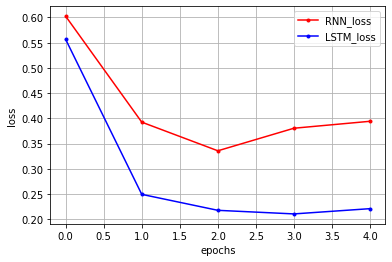

In [62]:
y_RNN_loss = history.history['val_loss']
y_LSTM_loss = hist.history['val_loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_RNN_loss, marker='.', c='red', label='RNN_loss')
plt.plot(x_len, y_LSTM_loss, marker='.', c='blue', label='LSTM_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# RNN 검증 손실값

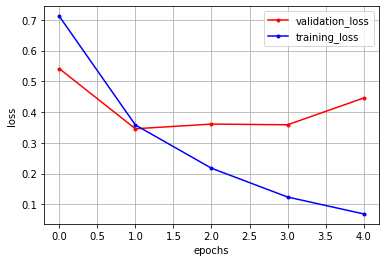

In [45]:
y_RNN_vloss = history.history['val_loss']
y_RNN_loss = history.history['loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_RNN_vloss, marker='.', c='red', label='validation_loss')
plt.plot(x_len, y_RNN_loss, marker='.', c='blue', label='training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# LSTM 검증 손실값

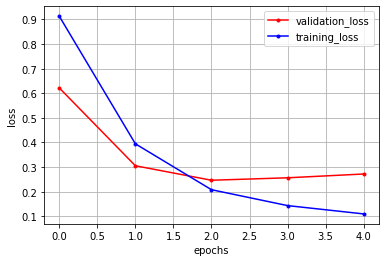

In [34]:
y_LSTM_vloss = hist.history['val_loss']
y_LSTM_loss = hist.history['loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_LSTM_vloss, marker='.', c='red', label='validation_loss')
plt.plot(x_len, y_LSTM_loss, marker='.', c='blue', label='training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# BiLSTM 검증 손실값

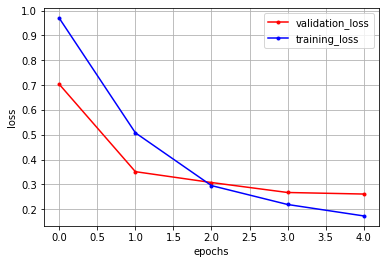

In [41]:
y_BiLSTM_vloss = bihist.history['val_loss']
y_BiLSTM_loss = bihist.history['loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_BiLSTM_vloss, marker='.', c='red', label='validation_loss')
plt.plot(x_len, y_BiLSTM_loss, marker='.', c='blue', label='training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# RNN은 과대적합(overfitting)이 일어남

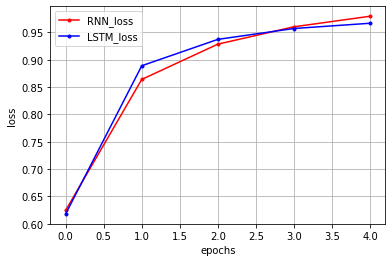

In [48]:
y_RNN_loss = history.history['acc']
y_LSTM_loss = hist.history['accuracy']

x_len = np.arange(len(y_RNN_loss))

plt.plot(x_len, y_RNN_loss, marker='.', c='red', label='RNN_loss')
plt.plot(x_len, y_LSTM_loss, marker='.', c='blue', label='LSTM_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# 세 가지 비교

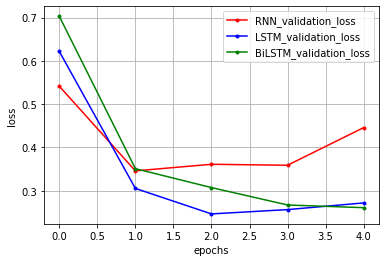

In [46]:
y_RNN_vloss = history.history['val_loss']
y_LSTM_vloss = hist.history['val_loss']
y_BiLSTM_vloss = bihist.history['val_loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_RNN_vloss, marker='.', c='red', label='RNN_validation_loss')
plt.plot(x_len, y_LSTM_vloss, marker='.', c='blue', label='LSTM_validation_loss')
plt.plot(x_len, y_BiLSTM_vloss, marker='.', c='green', label='BiLSTM_validation_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# 완벽비교!!!!!!


## BiLSTM 검증 손실

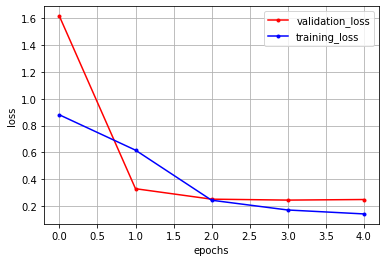

In [54]:
y_BiLSTM_vloss = Bihist.history['val_loss']
y_BiLSTM_loss = Bihist.history['loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_BiLSTM_vloss, marker='.', c='red', label='validation_loss')
plt.plot(x_len, y_BiLSTM_loss, marker='.', c='blue', label='training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

## RNN 검증 손실

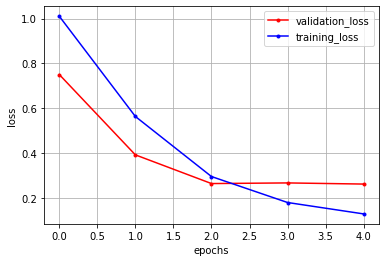

In [46]:
y_LSTM_vloss = RNNhist.history['val_loss']
y_LSTM_loss = RNNhist.history['loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_LSTM_vloss, marker='.', c='red', label='validation_loss')
plt.plot(x_len, y_LSTM_loss, marker='.', c='blue', label='training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

## LSTM 검증 손실

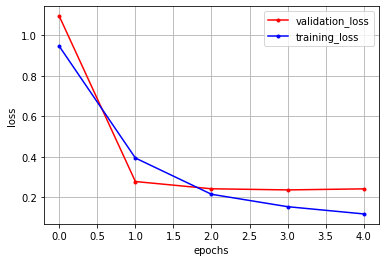

In [41]:
y_LSTM_vloss = LSTMhist.history['val_loss']
y_LSTM_loss = LSTMhist.history['loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_LSTM_vloss, marker='.', c='red', label='validation_loss')
plt.plot(x_len, y_LSTM_loss, marker='.', c='blue', label='training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

## 세 가지 비교

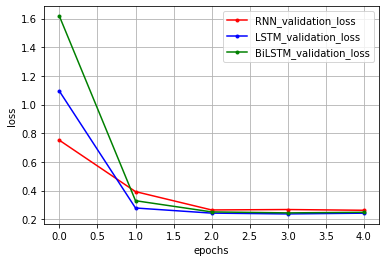

In [56]:
y_RNN_vloss = RNNhist.history['val_loss']
y_LSTM_vloss = LSTMhist.history['val_loss']
y_BiLSTM_vloss = Bihist.history['val_loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_RNN_vloss, marker='.', c='red', label='RNN_validation_loss')
plt.plot(x_len, y_LSTM_vloss, marker='.', c='blue', label='LSTM_validation_loss')
plt.plot(x_len, y_BiLSTM_vloss, marker='.', c='green', label='BiLSTM_validation_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# 찐막

### LSTM

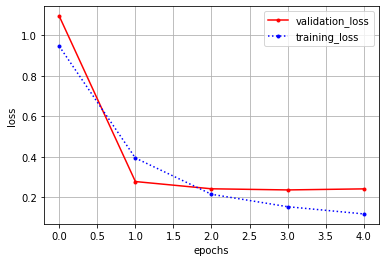

In [36]:
y_LSTM_vloss = [1.0932, 0.2780, 0.2423, 0.2367, 0.2419]
y_LSTM_loss = [0.9450, 0.3940, 0.2152, 0.1540, 0.1184]

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

#plt.plot(x_len, y_LSTM_vloss, marker='s-g', label='validation_loss')
plt.plot(x_len, y_LSTM_vloss, '.-r', label='validation_loss')
#plt.plot(x_len, y_LSTM_loss, marker='.', c='blue', label='training_loss')
plt.plot(x_len, y_LSTM_loss, '.:b', label='training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

### RNN

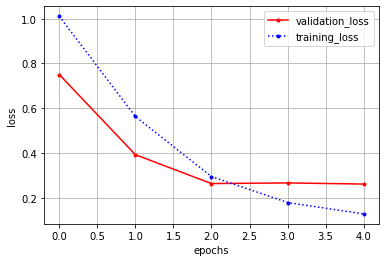

In [37]:
y_RNN_vloss = [0.7507, 0.3932, 0.2644, 0.2673, 0.2622]
y_RNN_loss = [1.0108, 0.5636, 0.2957, 0.1799, 0.1290]

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

#plt.plot(x_len, y_LSTM_vloss, marker='s-g', label='validation_loss')
plt.plot(x_len, y_RNN_vloss, '.-r', label='validation_loss')
#plt.plot(x_len, y_LSTM_loss, marker='.', c='blue', label='training_loss')
plt.plot(x_len, y_RNN_loss, '.:b', label='training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

### BiLSTM

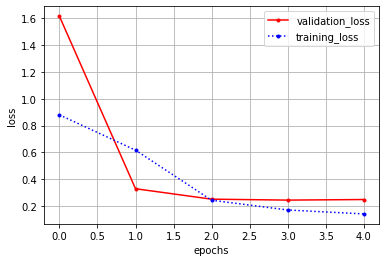

In [38]:
y_BiLSTM_vloss = [1.6164, 0.3289, 0.2509, 0.2439, 0.2482]
y_BiLSTM_loss = [0.8804, 0.6167, 0.2430, 0.1701, 0.1408]

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

#plt.plot(x_len, y_LSTM_vloss, marker='s-g', label='validation_loss')
plt.plot(x_len, y_BiLSTM_vloss, '.-r', label='validation_loss')
#plt.plot(x_len, y_LSTM_loss, marker='.', c='blue', label='training_loss')
plt.plot(x_len, y_BiLSTM_loss, '.:b', label='training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

### 세 가지 비교 

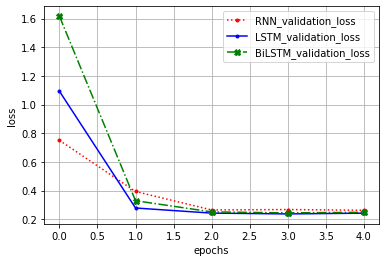

In [41]:
y_RNN_vloss = [0.7507, 0.3932, 0.2644, 0.2673, 0.2622]
y_LSTM_vloss = [1.0932, 0.2780, 0.2423, 0.2367, 0.2419]
y_BiLSTM_vloss = [1.6164, 0.3289, 0.2509, 0.2439, 0.2482]

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_RNN_vloss, '.:r', label='RNN_validation_loss')
plt.plot(x_len, y_LSTM_vloss, '.-b', label='LSTM_validation_loss')
plt.plot(x_len, y_BiLSTM_vloss, '-.Xg', label='BiLSTM_validation_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# val_loss, train_loss 비교

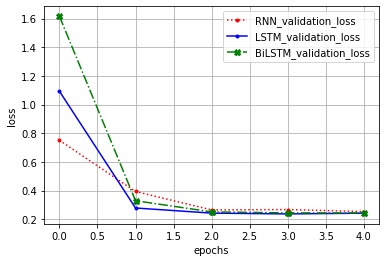

In [10]:
y_RNN_vloss = [0.7507, 0.3932, 0.2644, 0.2673, 0.2529]
y_LSTM_vloss = [1.0932, 0.2780, 0.2423, 0.2367, 0.2419]
y_BiLSTM_vloss = [1.6164, 0.3289, 0.2509, 0.2439, 0.2430]

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_RNN_vloss, '.:r', label='RNN_validation_loss')
plt.plot(x_len, y_LSTM_vloss, '.-b', label='LSTM_validation_loss')
plt.plot(x_len, y_BiLSTM_vloss, '-.Xg', label='BiLSTM_validation_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

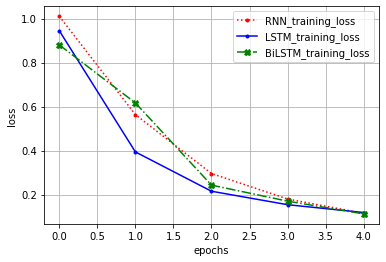

In [11]:
y_RNN_loss = [1.0108, 0.5636, 0.2957, 0.1799, 0.1147]
y_LSTM_loss = [0.9450, 0.3940, 0.2152, 0.1540, 0.1184]
y_BiLSTM_loss = [0.8804, 0.6167, 0.2430, 0.1701, 0.1121]

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_RNN_loss, '.:r', label='RNN_training_loss')
plt.plot(x_len, y_LSTM_loss, '.-b', label='LSTM_training_loss')
plt.plot(x_len, y_BiLSTM_loss, '-.Xg', label='BiLSTM_training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y_RNN_acc = [1.0108, 0.5636, 0.2957, 0.1799, 0.1147]
y_LSTM_acc = [0.9450, 0.3940, 0.2152, 0.1540, 0.1184]
y_BiLSTM_acc = [0.8804, 0.6167, 0.2430, 0.1701, 0.1121]

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_RNN_acc, '.:r', label='RNN_accuracy')
plt.plot(x_len, y_LSTM_acc, '.-b', label='LSTM_accuracy')
plt.plot(x_len, y_BiLSTM_acc, '-.Xg', label='BiLSTM_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.show()

# 훈련시간

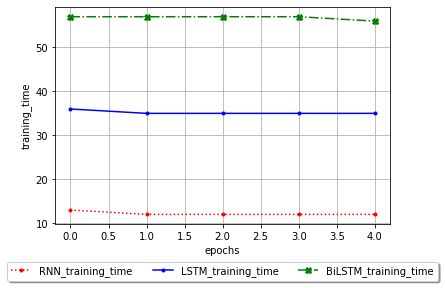

In [19]:
y_RNN_time = [13, 12, 12, 12, 12]
y_LSTM_time = [36, 35, 35, 35, 35]
y_BiLSTM_time = [57, 57, 57, 57, 56]

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_RNN_time, '.:r', label='RNN_training_time')
plt.plot(x_len, y_LSTM_time, '.-b', label='LSTM_training_time')
plt.plot(x_len, y_BiLSTM_time, '-.Xg', label='BiLSTM_training_time')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.xlabel('epochs')
plt.ylabel('training_time')
plt.grid()
plt.show()